# Load the Dataset:

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Initial Exploration

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Display the columns and their data types
print(data.info())

# Optionally, you can display some basic statistics about the dataset
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Feature Extraction

# Steps for Feature Extraction

# Extract Length of Restaurant Name and Address:

In [3]:
# Extracting the length of Restaurant Name and Address
data['Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)

# Print the result
print(data[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())


          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


# Count of Words in Restaurant Name and Address

In [4]:
# Counting the number of words in Restaurant Name and Address
data['Name Word Count'] = data['Restaurant Name'].apply(lambda x: len(x.split()))
data['Address Word Count'] = data['Address'].apply(lambda x: len(x.split()))

# Print the result
print(data[['Restaurant Name', 'Name Word Count', 'Address', 'Address Word Count']].head())


          Restaurant Name  Name Word Count  \
0        Le Petit Souffle                3   
1        Izakaya Kikufuji                2   
2  Heat - Edsa Shangri-La                4   
3                    Ooma                1   
4             Sambo Kojin                2   

                                             Address  Address Word Count  
0  Third Floor, Century City Mall, Kalayaan Avenu...                  10  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...                  10  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...                   8  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...                  10  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...                   9  


# Presence of Certain Keywords in Restaurant Name

In [5]:
# Identifying the presence of certain keywords in Restaurant Name

# List of keywords to check for
keywords = ['Cafe', 'Bar', 'Grill', 'Restaurant', 'Bistro']

# Checking for each keyword in the restaurant name
for keyword in keywords:
    data[f'Contains {keyword}'] = data['Restaurant Name'].apply(lambda x: keyword in x)

# Print the result with the newly added keyword columns
print(data[['Restaurant Name'] + [f'Contains {k}' for k in keywords]].head())


          Restaurant Name  Contains Cafe  Contains Bar  Contains Grill  \
0        Le Petit Souffle          False         False           False   
1        Izakaya Kikufuji          False         False           False   
2  Heat - Edsa Shangri-La          False         False           False   
3                    Ooma          False         False           False   
4             Sambo Kojin          False         False           False   

   Contains Restaurant  Contains Bistro  
0                False            False  
1                False            False  
2                False            False  
3                False            False  
4                False            False  


          Restaurant Name  Contains Cafe  Contains Bar  Contains Grill  \
0        Le Petit Souffle          False         False           False   
1        Izakaya Kikufuji          False         False           False   
2  Heat - Edsa Shangri-La          False         False           False   
3                    Ooma          False         False           False   
4             Sambo Kojin          False         False           False   

   Contains Restaurant  Contains Bistro  
0                False            False  
1                False            False  
2                False            False  
3                False            False  
4                False            False  


# Extract Zip Code from Address

In [7]:
import re

# Assuming zip code is a sequence of digits at the end of the address
zip_code_regex = r'\b\d{5}\b'  # Adjust the regex according to the zip code format

# Function to extract zip code using regex
def extract_zip_code(address):
    match = re.search(zip_code_regex, address)
    return match.group() if match else None

# Extracting zip code
data['Zip Code'] = data['Address'].apply(extract_zip_code)

# Print the result
print(data[['Address', 'Zip Code']].head())


                                             Address Zip Code
0  Third Floor, Century City Mall, Kalayaan Avenu...     None
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...     None
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...     None
3  Third Floor, Mega Fashion Hall, SM Megamall, O...     None
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...     None


# Extracting Cuisine Type Count from 'Cuisines' Column

In [8]:
# Extracting the count of different cuisines offered by a restaurant
data['Cuisine Count'] = data['Cuisines'].apply(lambda x: len(str(x).split(',')))

# Print the result
print(data[['Restaurant Name', 'Cuisines', 'Cuisine Count']].head())


          Restaurant Name                          Cuisines  Cuisine Count
0        Le Petit Souffle        French, Japanese, Desserts              3
1        Izakaya Kikufuji                          Japanese              1
2  Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian              4
3                    Ooma                   Japanese, Sushi              2
4             Sambo Kojin                  Japanese, Korean              2


# Extracting City and Country

In [9]:
# Example: Count of restaurants per city
city_counts = data['City'].value_counts()
print("Count of restaurants per city:")
print(city_counts.head())


Count of restaurants per city:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


# Using Latitude and Longitude

In [10]:
# Example: Categorizing restaurants based on latitude (Northern vs Southern Hemisphere)
data['Hemisphere'] = data['Latitude'].apply(lambda x: 'Northern' if x >= 0 else 'Southern')
print("Distribution of restaurants in Hemispheres:")
print(data['Hemisphere'].value_counts())


Distribution of restaurants in Hemispheres:
Hemisphere
Northern    9348
Southern     203
Name: count, dtype: int64


# Proximity to a Landmark or Central Location

In [13]:
# Hypothetical central point coordinates (replace with actual coordinates)
central_latitude = 40.7128  # Example: Latitude of New York City
central_longitude = -74.0060  # Example: Longitude of New York City

# Central point
central_point = {'latitude': central_latitude, 'longitude': central_longitude}

# Function to calculate distance (using Haversine formula)
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate distance
data['Distance to Center'] = data.apply(lambda row: haversine(central_point['longitude'], central_point['latitude'], row['Longitude'], row['Latitude']), axis=1)

# Print the result
print("Distance of restaurants to city center:")
print(data[['Restaurant Name', 'Distance to Center']].head())


Distance of restaurants to city center:
          Restaurant Name  Distance to Center
0        Le Petit Souffle        13675.788172
1        Izakaya Kikufuji        13677.395501
2  Heat - Edsa Shangri-La        13673.323294
3                    Ooma        13672.909236
4             Sambo Kojin        13672.976956


#  Identifying Urban vs Rural

In [12]:
# Example: Marking restaurants in a specific dense locality as Urban
urban_localities = ['Downtown', 'City Center']  # Example localities
data['Area Type'] = data['Locality'].apply(lambda x: 'Urban' if x in urban_localities else 'Rural')

print("Urban vs Rural classification:")
print(data[['Restaurant Name', 'Area Type']].head())


Urban vs Rural classification:
          Restaurant Name Area Type
0        Le Petit Souffle     Rural
1        Izakaya Kikufuji     Rural
2  Heat - Edsa Shangri-La     Rural
3                    Ooma     Rural
4             Sambo Kojin     Rural


# Scatter Plot for Geographic Data

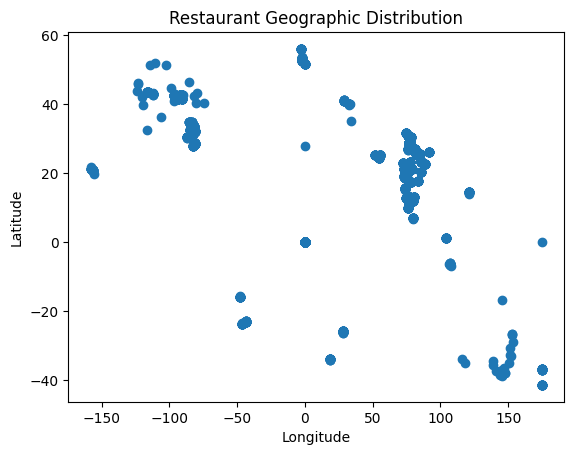

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data['Longitude'], data['Latitude'])
plt.title('Restaurant Geographic Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Histogram of Ratings

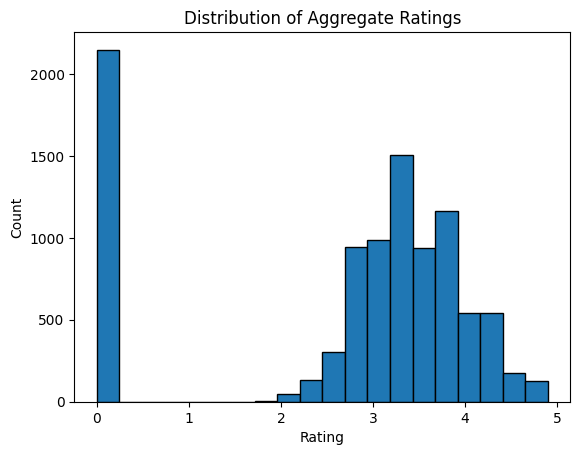

In [15]:
plt.hist(data['Aggregate rating'], bins=20, edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Box Plot for Price Range in Different Cities

<Figure size 1000x600 with 0 Axes>

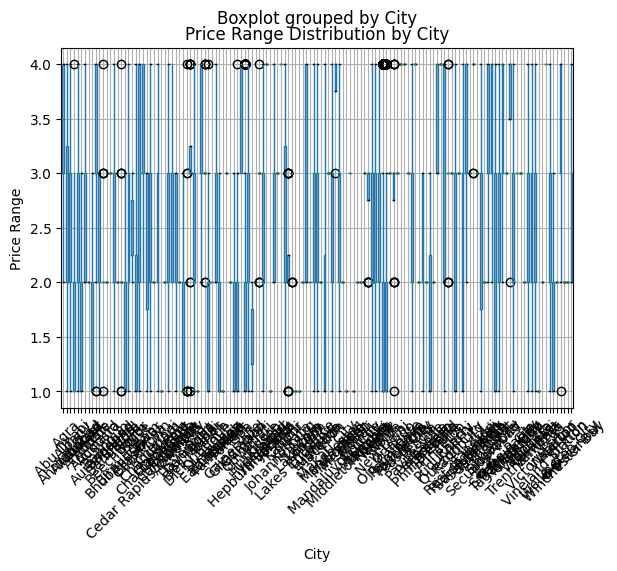

In [16]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Price range', by='City', rot=45)
plt.title('Price Range Distribution by City')
plt.ylabel('Price Range')
plt.show()


# Bar Chart of Cuisine Types

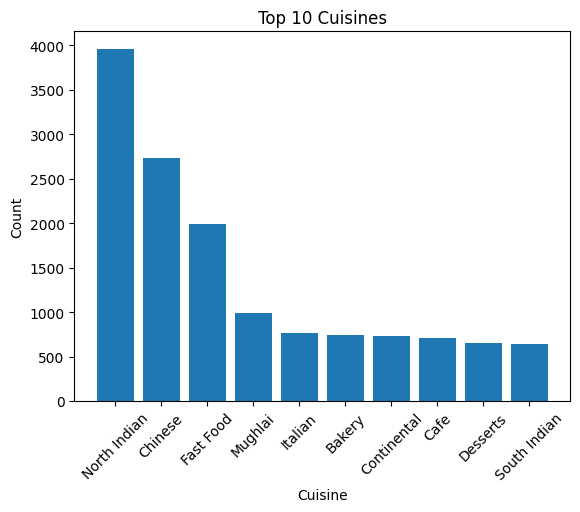

In [17]:
from collections import Counter
import itertools

# Splitting and flattening the list of cuisines
cuisine_list = list(itertools.chain(*data['Cuisines'].dropna().str.split(', ')))
cuisine_counts = Counter(cuisine_list)

# Selecting top 10 cuisines for visualization
top_cuisines = dict(cuisine_counts.most_common(10))

plt.bar(top_cuisines.keys(), top_cuisines.values())
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Correlation Heatmap

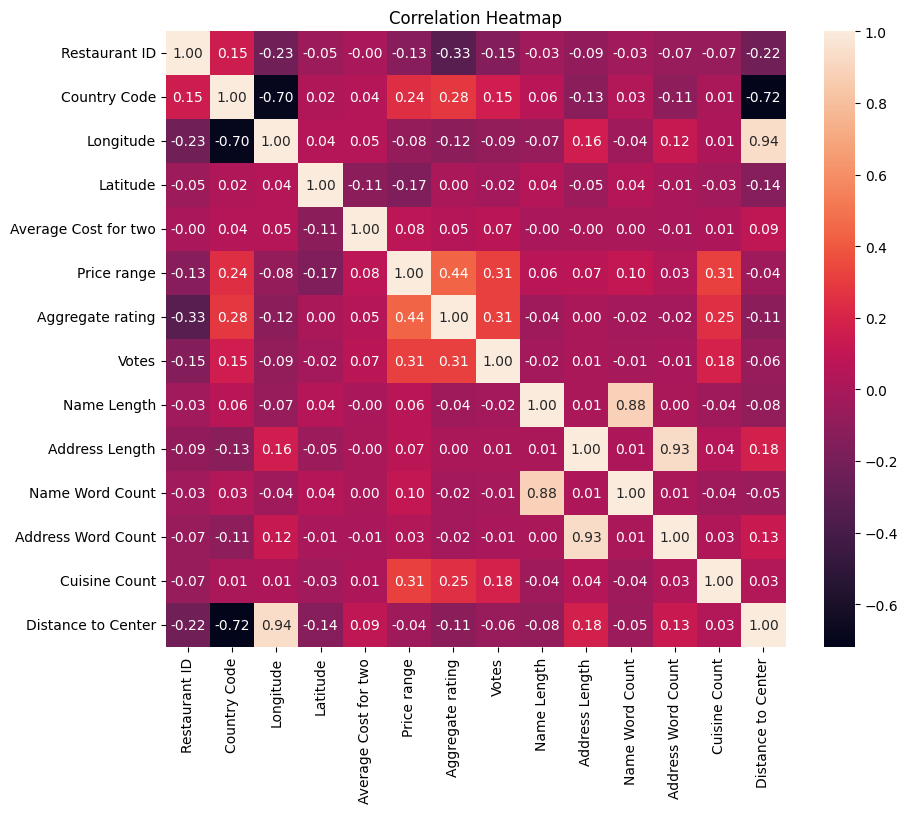

In [18]:
import seaborn as sns

# Calculating correlations
corr = data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Feature Encoding

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Step 1: Encode 'Has Table Booking'
data['Has Table Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})

# Step 2: Encode 'Has Online Delivery'
data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Step 3: Verify the Encoded Features
print(data[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())


  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3                No                  0                  No   
4               Yes                  1                  No   

   Has Online Delivery  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


# Label Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

# Example Column: 'Rating text'
label_encoder = LabelEncoder()
data['Rating Text Encoded'] = label_encoder.fit_transform(data['Rating text'])

# Print the result
print(data[['Rating text', 'Rating Text Encoded']].head())


  Rating text  Rating Text Encoded
0   Excellent                    1
1   Excellent                    1
2   Very Good                    5
3   Excellent                    1
4   Excellent                    1


# One-Hot Encoding

In [4]:
data_one_hot = pd.get_dummies(data, columns=['Rating text'])

# Print the result
print(data_one_hot.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Binary Encoding

In [8]:
import category_encoders as ce

# Example Column: 'City'
encoder = ce.BinaryEncoder(cols=['City'])
data_binary_encoded = encoder.fit_transform(data)

# Print the result
print(data_binary_encoded.head())


   Restaurant ID         Restaurant Name  Country Code  City_0  City_1  \
0        6317637        Le Petit Souffle           162       0       0   
1        6304287        Izakaya Kikufuji           162       0       0   
2        6300002  Heat - Edsa Shangri-La           162       0       0   
3        6318506                    Ooma           162       0       0   
4        6314302             Sambo Kojin           162       0       0   

   City_2  City_3  City_4  City_5  City_6  ...  Price range Aggregate rating  \
0       0       0       0       0       0  ...            3              4.8   
1       0       0       0       0       0  ...            3              4.5   
2       0       0       0       0       1  ...            4              4.4   
3       0       0       0       0       1  ...            4              4.9   
4       0       0       0       0       1  ...            4              4.8   

  Rating color Rating text  Votes  Has Table Booking Has Online Delivery  

#  Frequency Encoding

In [6]:
frequency_map = data['City'].value_counts().to_dict()
data['City Frequency'] = data['City'].map(frequency_map)

# Print the result
print(data[['City', 'City Frequency']].head())


               City  City Frequency
0       Makati City               2
1       Makati City               2
2  Mandaluyong City               4
3  Mandaluyong City               4
4  Mandaluyong City               4


# Mean Encoding

In [7]:
# Assuming 'Votes' is the target variable
mean_encode = data.groupby('City')['Votes'].mean()
data['City Mean Encoded'] = data['City'].map(mean_encode)

# Print the result
print(data[['City', 'City Mean Encoded']].head())


               City  City Mean Encoded
0       Makati City              452.5
1       Makati City              452.5
2  Mandaluyong City              300.0
3  Mandaluyong City              300.0
4  Mandaluyong City              300.0


# Interaction Features

In [9]:
# Creating an interaction feature between 'Price range' and 'Aggregate rating'
data['Price-Rating Interaction'] = data['Price range'] * data['Aggregate rating']

# Print the result
print(data[['Price range', 'Aggregate rating', 'Price-Rating Interaction']].head())


   Price range  Aggregate rating  Price-Rating Interaction
0            3               4.8                      14.4
1            3               4.5                      13.5
2            4               4.4                      17.6
3            4               4.9                      19.6
4            4               4.8                      19.2


# Binning

In [10]:
# Binning 'Aggregate rating'
bins = [0, 2, 3, 4, 5]
labels = ['Low', 'Below Average', 'Above Average', 'High']
data['Rating Bin'] = pd.cut(data['Aggregate rating'], bins=bins, labels=labels)

# Print the result
print(data[['Aggregate rating', 'Rating Bin']].head())


   Aggregate rating Rating Bin
0               4.8       High
1               4.5       High
2               4.4       High
3               4.9       High
4               4.8       High


# Heatmap for One-Hot Encoded Data

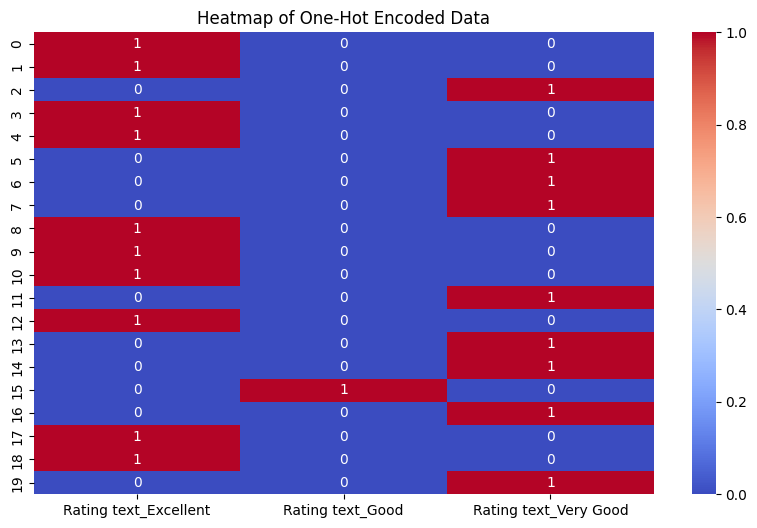

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-Hot Encoding a small subset for visualization
small_subset = pd.get_dummies(data[['Rating text']].head(20))

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(small_subset, annot=True, cmap='coolwarm')
plt.title('Heatmap of One-Hot Encoded Data')
plt.show()


# Parallel Coordinates Plot for Encoded Data

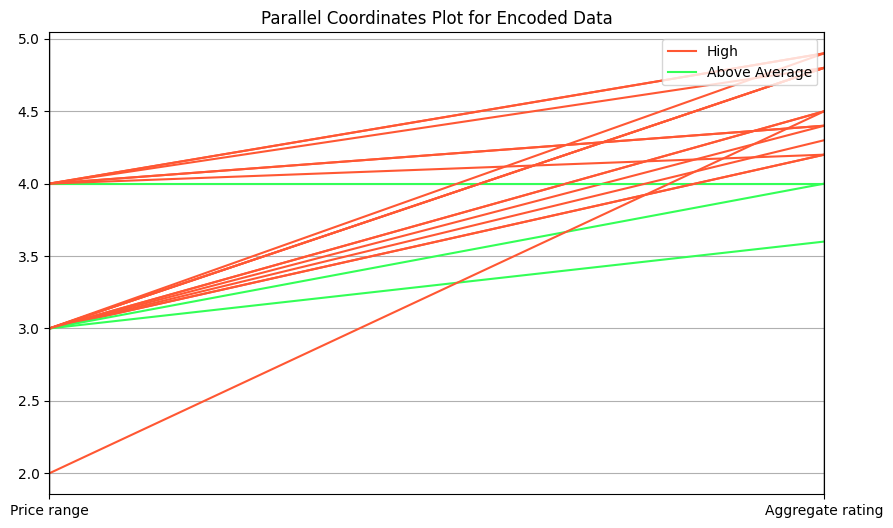

In [12]:
from pandas.plotting import parallel_coordinates

# Prepare a small subset with encoded data for visualization
data_encoded = data[['Price range', 'Aggregate rating', 'Rating Bin']].head(20)

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
parallel_coordinates(data_encoded, 'Rating Bin', color=['#FF5733', '#33FF57', '#3357FF'])
plt.title('Parallel Coordinates Plot for Encoded Data')
plt.show()
